<a href="https://colab.research.google.com/github/asheelvant3/AIC-Project/blob/main/AICDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Amazon Electronic 1M

Number of unique USERS in original dataset =  754152
Number of unique PRODUCTS in original dataset =  59633
Number of users who has given 50 or more number of ratings = 3345
Number of unique USERS in sample dataset =  37
Number of unique PRODUCTS in sample dataset =  2851


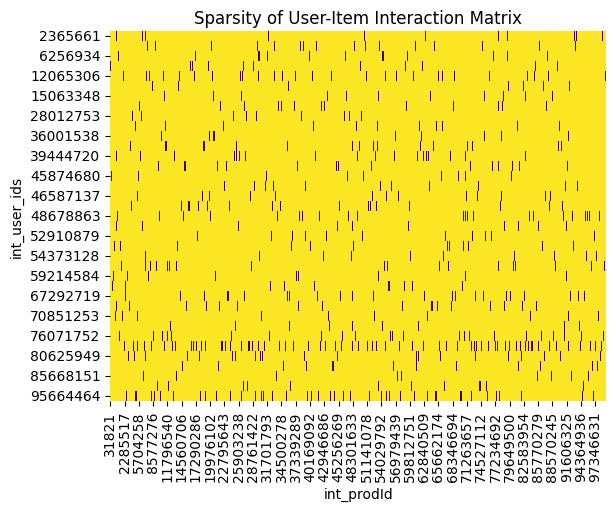

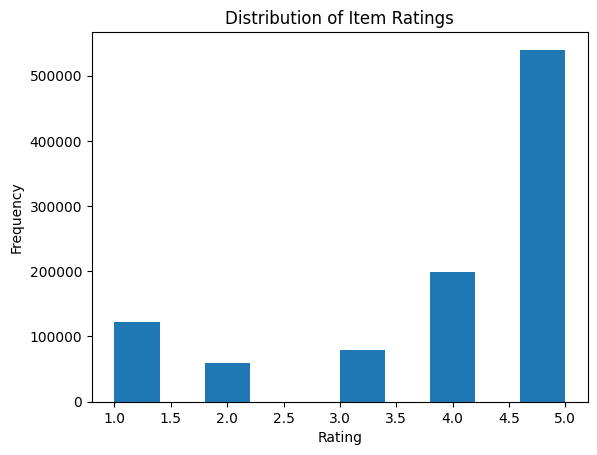

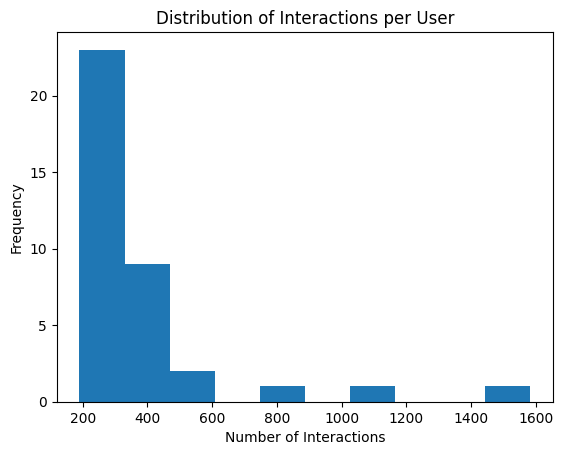

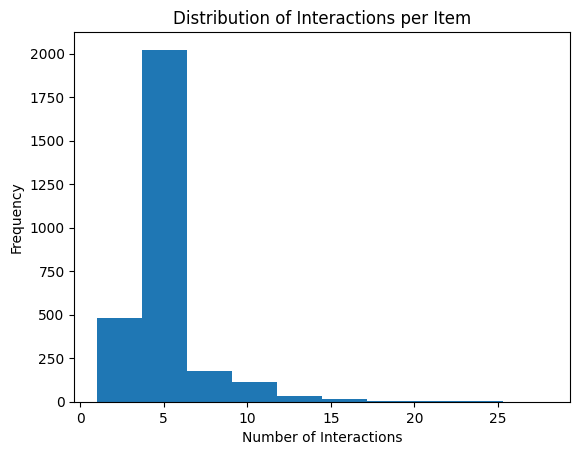

In [3]:
ama1M=pd.read_csv("/content/drive/MyDrive/Project/daisyRec/data/amazon-electronic/ratings_Electronics.csv")
ama1M.rename(columns = {'AKM1MP6P0OYPR':'userId', '0132793040':'productId', '5.0':'ratings', 
                                 '1365811200':'timestamp',}, inplace = True)
ama1M.drop(['timestamp'], axis = 1, inplace = True)
print('Number of unique USERS in original dataset = ', ama1M['userId'].nunique())
print('Number of unique PRODUCTS in original dataset = ', ama1M['productId'].nunique())
#Applying hash functions to convert to numeric so visualizations can be done
ama1M['productId'] = ama1M['productId'].apply(lambda x: hash(x) % (10 ** 8) + 1)
ama1M['userId'] = ama1M['userId'].apply(lambda x: hash(x) % (10 ** 8) + 1)
users_count = ama1M.userId.value_counts()
#reducing the size since it was too large. Removing users with frequency less than 50
ele_ratings_df_sample = ama1M[ama1M.userId.isin(users_count[users_count >= 50].index)]
#after filtering out
print('Number of users who has given 50 or more number of ratings =', len(ele_ratings_df_sample))
print('Number of unique USERS in sample dataset = ', ele_ratings_df_sample['userId'].nunique())
print('Number of unique PRODUCTS in sample dataset = ', ele_ratings_df_sample['productId'].nunique())

interactions = ele_ratings_df_sample.pivot_table(index='userId', columns='productId', values='ratings')

#Visualizations
sns.heatmap(interactions.isnull(), cmap='viridis', cbar=False)
plt.title('Sparsity of User-Item Interaction Matrix')
plt.xlabel('int_prodId')
plt.ylabel('int_user_ids')
plt.show()
#Distribution of Item Ratings
plt.hist(ama1M['ratings'], bins=10)
plt.title('Distribution of Item Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


user_interactions = interactions.sum(axis=1)
item_interactions = interactions.sum(axis=0)

#Distribution of Interactions per User
plt.hist(user_interactions, bins=10)
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()

#Distribution of Interactions per Item
plt.hist(item_interactions, bins=10)
plt.title('Distribution of Interactions per Item')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()

Number of unique USERS in original dataset =  89938
Number of unique PRODUCTS in original dataset =  6917
       Unnamed: 0    userId  productId  ratings
0               0  21535344   60335755      5.0
1               1  79732675   90690037      1.0
2               2  52464800   90690037      3.0
3               3  49519961   90690037      1.0
4               4  79502827   45175218      5.0
...           ...       ...        ...      ...
99995       99995   8131754   20080314      5.0
99996       99996  31835287   20080314      5.0
99997       99997  78465320   20080314      5.0
99998       99998  43302618   20080314      5.0
99999       99999  95570594   20080314      5.0

[100000 rows x 4 columns]
Number of users who has given 50 or more number of ratings = 16202
Number of unique USERS in sample dataset =  6100
Number of unique PRODUCTS in sample dataset =  3756


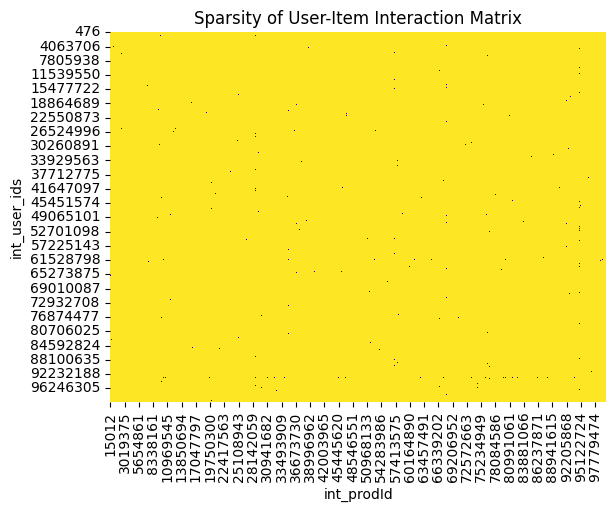

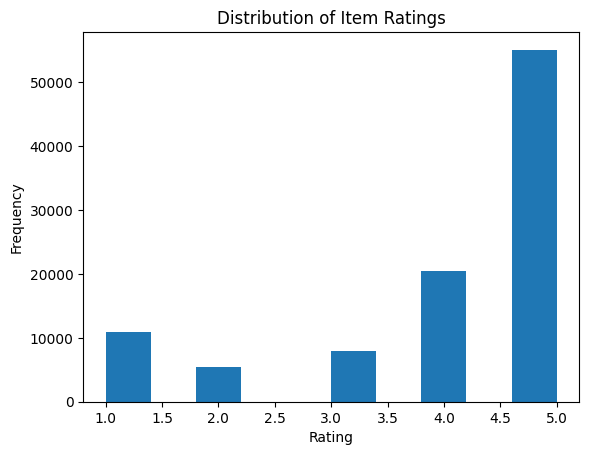

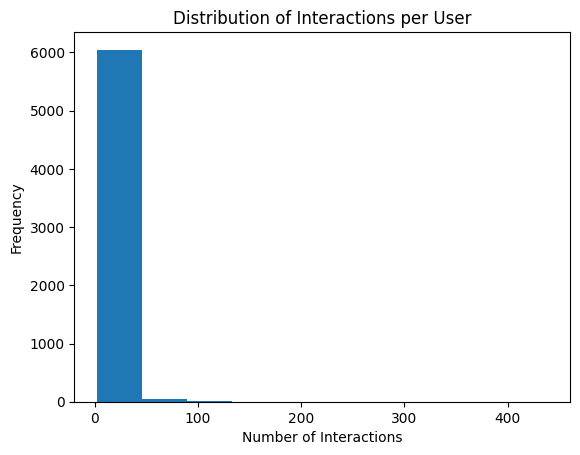

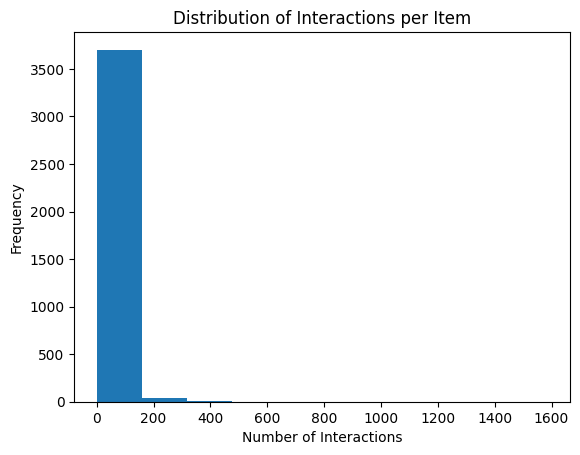

In [8]:
ama100k=pd.read_csv("/content/drive/MyDrive/Project/daisyRec/data/amazon-electronic/ratings_Electronics100k.csv")
ama100k.rename(columns = {'AKM1MP6P0OYPR':'userId', '0132793040':'productId', '5.0':'ratings', 
                                 '1365811200':'timestamp',}, inplace = True)
ama100k.drop(['timestamp'], axis = 1, inplace = True)
# print(ama100k)
print('Number of unique USERS in original dataset = ', ama100k['userId'].nunique())
print('Number of unique PRODUCTS in original dataset = ', ama100k['productId'].nunique())
# #Applying hash functions to convert to numeric so visualizations can be done
ama100k['productId'] = ama100k['productId'].apply(lambda x: hash(x) % (10 ** 8) + 1)
ama100k['userId'] = ama100k['userId'].apply(lambda x: hash(x) % (10 ** 8) + 1)
print(ama100k)
users_count = ama100k.userId.value_counts()
#reducing the size since it was too large. Removing users with frequency less than 50
ele_ratings_df_sample = ama100k[ama100k.userId.isin(users_count[users_count >= 2].index)]
#after filtering out
print('Number of users who has given 50 or more number of ratings =', len(ele_ratings_df_sample))
print('Number of unique USERS in sample dataset = ', ele_ratings_df_sample['userId'].nunique())
print('Number of unique PRODUCTS in sample dataset = ', ele_ratings_df_sample['productId'].nunique())

interactions = ele_ratings_df_sample.pivot_table(index='userId', columns='productId', values='ratings')

# Visualizations
sns.heatmap(interactions.isnull(), cmap='viridis', cbar=False)
plt.title('Sparsity of User-Item Interaction Matrix')
plt.xlabel('int_prodId')
plt.ylabel('int_user_ids')
plt.show()
#Distribution of Item Ratings
plt.hist(ama100k['ratings'], bins=10)
plt.title('Distribution of Item Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


user_interactions = interactions.sum(axis=1)
item_interactions = interactions.sum(axis=0)

#Distribution of Interactions per User
plt.hist(user_interactions, bins=10)
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()

#Distribution of Interactions per Item
plt.hist(item_interactions, bins=10)
plt.title('Distribution of Interactions per Item')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()

MovieLens 1M


Description
Number of unique USERS in original dataset =  6040
Number of unique Movies in original dataset =  3706


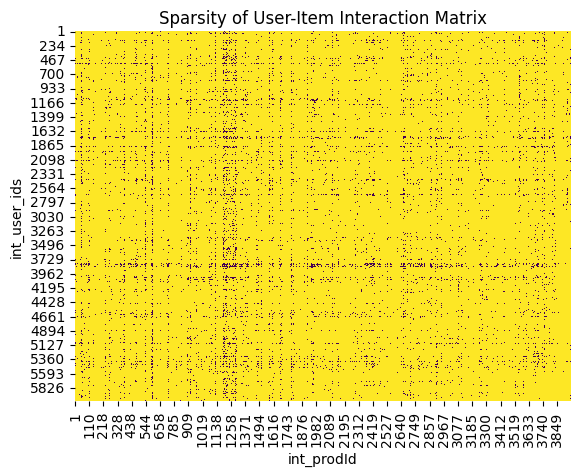

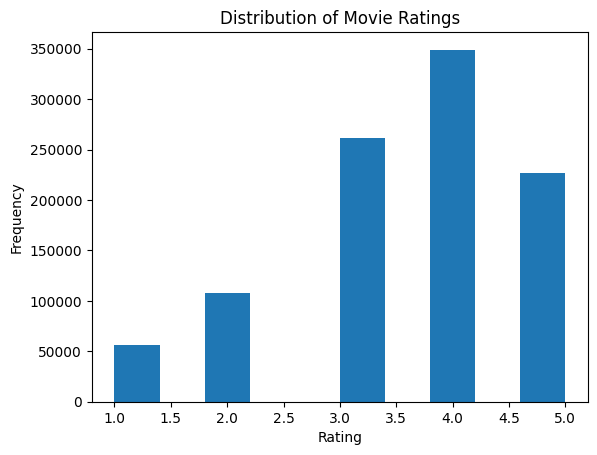

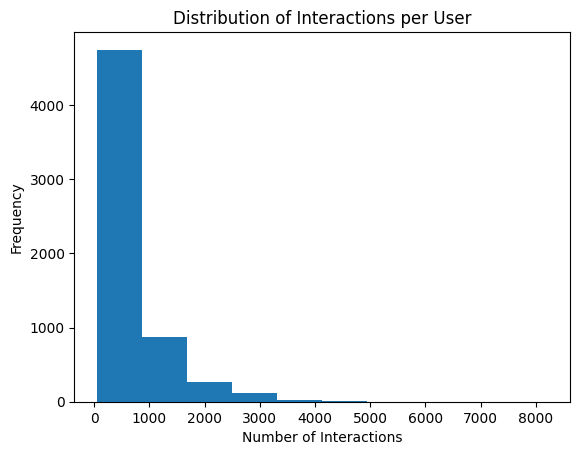

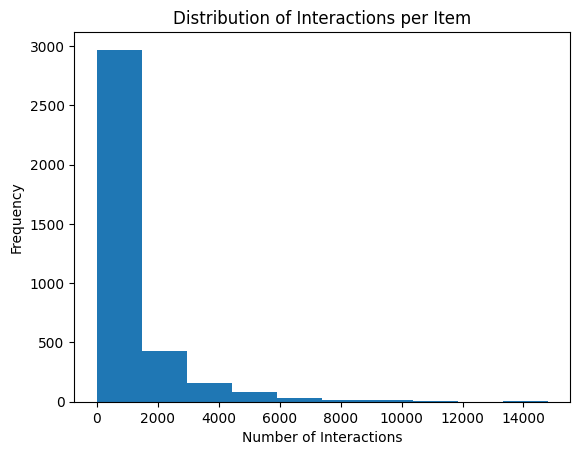

In [91]:
ml1M = pd.read_csv("/content/drive/MyDrive/Project/daisyRec/data/ml-1m/ratings.dat", sep="::", usecols = [0, 1, 2], names = ['userID', 'movieID', 'rating'], engine = 'python')
print("Description")
ml1M.info
print('Number of unique USERS in original dataset = ', ml1M['userID'].nunique())
print('Number of unique Movies in original dataset = ', ml1M['movieID'].nunique())
interactions2 = ml1M.pivot_table(index='userID', columns='movieID', values='rating')
sns.heatmap(interactions2.isnull(), cmap='viridis', cbar=False)

#Visualizations
plt.title('Sparsity of User-Item Interaction Matrix')
plt.xlabel('int_prodId')
plt.ylabel('int_user_ids')
plt.show()
#Distribution of Item Ratings
plt.hist(ml1M['rating'], bins=10)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#Distribution of Interactions per User
user_interactions = interactions2.sum(axis=1)
item_interactions = interactions2.sum(axis=0)
plt.hist(user_interactions, bins=10)
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()

#Distribution of Interactions per Item
plt.hist(item_interactions, bins=10)
plt.title('Distribution of Interactions per Item')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()

Movie Lens 100k

       userID  movieID  rating
0         196      242       3
1         186      302       3
2          22      377       1
3         244       51       2
4         166      346       1
...       ...      ...     ...
99995     880      476       3
99996     716      204       5
99997     276     1090       1
99998      13      225       2
99999      12      203       3

[100000 rows x 3 columns]
Number of unique USERS in original dataset =  943
Number of unique Movies in original dataset =  1682


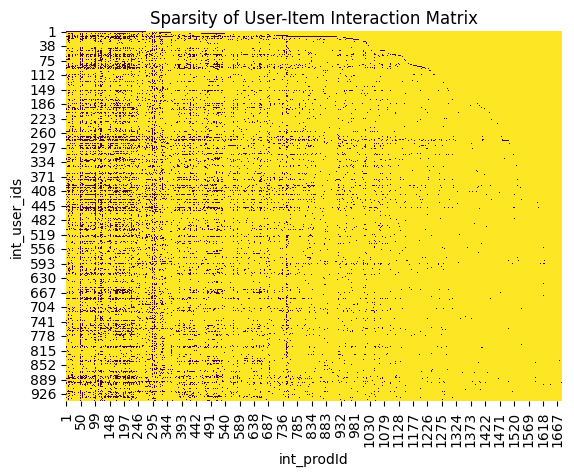

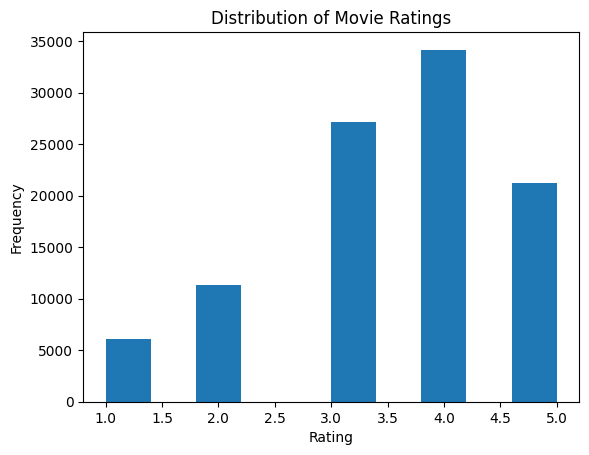

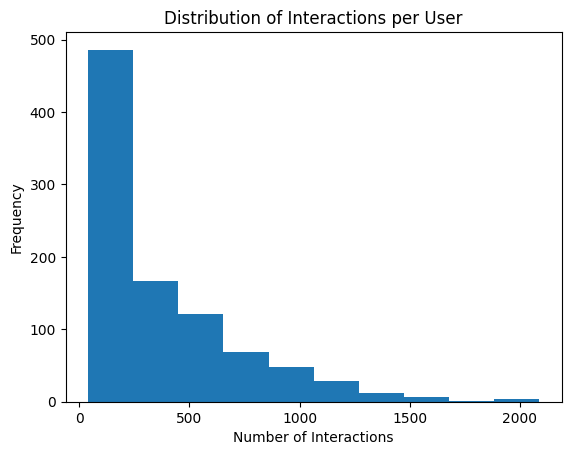

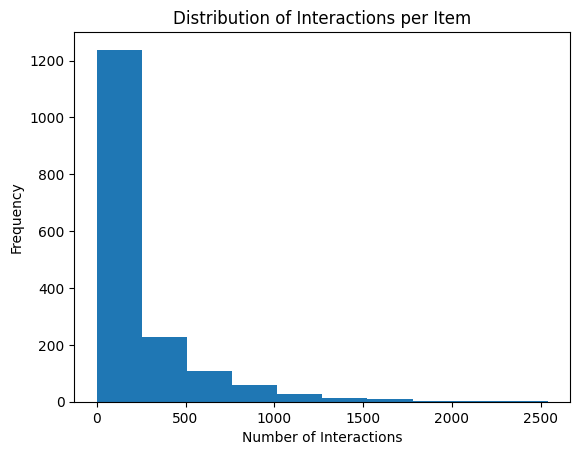

In [12]:
ml100k = pd.read_csv("/content/drive/MyDrive/Project/daisyRec/data/ml-100k/u.data", sep="\t", usecols = [0, 1, 2], names = ['userID', 'movieID', 'rating'], engine = 'python')
print(ml100k)
ml100k.info
print('Number of unique USERS in original dataset = ', ml100k['userID'].nunique())
print('Number of unique Movies in original dataset = ', ml100k['movieID'].nunique())
interactions2 = ml100k.pivot_table(index='userID', columns='movieID', values='rating')


#Visualizations
sns.heatmap(interactions2.isnull(), cmap='viridis', cbar=False)
plt.title('Sparsity of User-Item Interaction Matrix')
plt.xlabel('int_prodId')
plt.ylabel('int_user_ids')
plt.show()
#Distribution of Item Ratings
plt.hist(ml100k['rating'], bins=10)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#Distribution of Interactions per User
user_interactions = interactions2.sum(axis=1)
item_interactions = interactions2.sum(axis=0)
plt.hist(user_interactions, bins=10)
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()

#Distribution of Interactions per Item
plt.hist(item_interactions, bins=10)
plt.title('Distribution of Interactions per Item')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()